<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/D_Aasritha_Reddy/Final_notebook_ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***01-Data_Import_and_Overview***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('all_season_details.csv')

<ipython-input-72-376d8e14a58b>:1: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
print("The shape of dataset is:",df.shape)
print("The size of dataset is:",df.size)
print("The dimensions of dataset is:",df.ndim)

The shape of dataset is: (242550, 45)
The size of dataset is: 10914750
The dimensions of dataset is: 2


In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

  batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0     1060380  Ruturaj Gaikwad              0               0         NaN   
1     1060380  Ruturaj Gaikwad              0               0         NaN   
2      379140     Devon Conway              0               2         NaN   
3      379140     Devon Conway              0               2         NaN   
4     1060380  Ruturaj Gaikwad              1               2         NaN   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        NaN              NaN             NaN               NaN   
1        NaN              NaN             NaN               NaN   
2        NaN              NaN             NaN               NaN   
3        NaN              NaN             NaN               NaN   
4        NaN              NaN             NaN               NaN   

   wkt_batsman_balls wkt_text  isRetiredHurt  \
0                NaN      NaN          False   
1                NaN      NaN          False   
2                NaN      NaN          False   
3                NaN      NaN          False   
4                NaN      NaN          False   

                                                text  \
0  nice and full, angling and perhaps swinging in...   
1  Conway shuffles across off, and shimmies out a...   
2  good length, angling in at off and then straig...   
3  shorter and slanting into middle and leg, Gaik...   
4  Sha

# ***02-EDA_Basic_Statistics***

In [ ]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [ ]:
print("The info is:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [ ]:
print("Describe:",df.describe())

Describe:           comment_id         season      match_id     innings_id  \
count  242550.000000  242067.000000  2.425500e+05  242550.000000   
mean    86415.531767    2015.588048  8.701769e+05       1.483245   
std     79516.360959       4.639506  3.530671e+05       0.499720   
min       110.000000    2008.000000  3.359820e+05       1.000000   
25%     18040.000000    2012.000000  5.483150e+05       1.000000   
50%     29010.000000    2015.000000  8.298190e+05       1.000000   
75%    118060.000000    2020.000000  1.216506e+06       2.000000   
max    219080.000000    2023.000000  1.370353e+06       2.000000   

                over           ball           runs   batsman1_id  \
count  242550.000000  242550.000000  242550.000000  2.425500e+05   
mean       10.161678       3.483875       1.317901  2.503057e+05   
std         5.658053       1.707451       1.612821  2.968806e+05   
min         1.000000       1.000000       0.000000  4.292000e+03   
25%         5.000000       2.000000  

In [ ]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts   

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Summary of Categorical Columns:")
print(df[categorical_cols].describe())

Summary of Categorical Columns:
       match_name home_team away_team current_innings               shortText  \
count      242550    242550    242550          242550                  242550   
unique        159        15        15              15                   88537   
top       DC v MI       CSK        MI              DC  Sharma to Kohli, 1 run   
freq         5965     29624     30851           37007                      94   

       batsman1_name         bowler1_name  batsman2_id   batsman2_name  \
count         242550               242550       242550          242548   
unique           637                  504          784             627   
top      Virat Kohli  Ravichandran Ashwin        28235  Shikhar Dhawan   
freq            5726                 4325         5343            5827   

               bowler2_name wkt_batsman_name wkt_bowler_name  \
count                229709            11880           11880   
unique                  497              594             437   

In [ ]:
df.nunique()

comment_id              380
season                   16
match_id               1023
match_name              159
home_team                15
away_team                15
current_innings          15
innings_id                2
over                     20
ball                      7
runs                      8
shortText             88537
isBoundary                2
isWide                    2
isNoball                  2
batsman1_id             635
batsman1_name           637
batsman1_runs           156
batsman1_balls           74
bowler1_id              503
bowler1_name            504
bowler1_overs            36
bowler1_maidens           3
bowler1_runs             70
bowler1_wkts              7
batsman2_id             784
batsman2_name           627
batsman2_runs           138
batsman2_balls           71
bowler2_id              496
bowler2_name            497
bowler2_overs            23
bowler2_maidens           3
bowler2_runs             68
bowler2_wkts              6
wicket_id               592
wkt_batsman_name        594
wkt_bowler_name         437
wkt_batsman_runs        120
wkt_batsman_balls        69
wkt_text              11880
isRetiredHurt             2
text                 236667
preText               43172
postText              19157
dtype: int64

In [ ]:
#shows only missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 season                  483
batsman2_name             2
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id            230670
wkt_batsman_name     230670
wkt_bowler_name      230670
wkt_batsman_runs     230670
wkt_batsman_balls    230670
wkt_text             230670
text                   1372
preText              196275
postText             222856
dtype: int64


In [ ]:
threshold = len(df) / 2

In [ ]:
columns_to_drop=df.columns[df.isnull().sum() > threshold]
print("Columns with more than 50% missing values:", columns_to_drop.tolist())

Columns with more than 50% missing values: ['wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text', 'preText', 'postText']


In [ ]:
df.dtypes

comment_id             int64
season               float64
match_id               int64
match_name            object
home_team             object
away_team             object
current_innings       object
innings_id             int64
over                   int64
ball                   int64
runs                   int64
shortText             object
isBoundary              bool
isWide                  bool
isNoball                bool
batsman1_id            int64
batsman1_name         object
batsman1_runs          int64
batsman1_balls         int64
bowler1_id             int64
bowler1_name          object
bowler1_overs        float64
bowler1_maidens        int64
bowler1_runs           int64
bowler1_wkts           int64
batsman2_id           object
batsman2_name         object
batsman2_runs          int64
batsman2_balls         int64
bowler2_id           float64
bowler2_name          object
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts         float64
wicket_id            float64
wkt_batsman_name      object
wkt_bowler_name       object
wkt_batsman_runs     float64
wkt_batsman_balls    float64
wkt_text              object
isRetiredHurt           bool
text                  object
preText               object
postText              object
dtype: object

In [ ]:
#correlation can be applied only for numerical datatypes
numerical_data = df.select_dtypes(include=['float64', 'int64'])
print("\nCorrelation Matrix for Numerical Features:")
print(numerical_data.corr())


Correlation Matrix for Numerical Features:
                   comment_id    season  match_id  innings_id      over  \
comment_id           1.000000  0.009912  0.008743    0.299848  0.793146   
season               0.009912  1.000000  0.987924    0.002108  0.010472   
match_id             0.008743  0.987924  1.000000    0.001331  0.009622   
innings_id           0.299848  0.002108  0.001331    1.000000 -0.043348   
over                 0.793146  0.010472  0.009622   -0.043348  1.000000   
ball                -0.009506  0.000873  0.000807   -0.003984 -0.012479   
runs                 0.056895  0.025873  0.027532   -0.006320  0.083481   
batsman1_id          0.029962  0.604742  0.588706    0.008640  0.033368   
batsman1_runs        0.255715  0.050924  0.054298   -0.015817  0.333018   
batsman1_balls       0.272337  0.010275  0.011505   -0.021632  0.343549   
bowler1_id           0.010107  0.664352  0.654227    0.004851  0.012383   
bowler1_overs        0.598364  0.015123  0.013268   -0.0

# ***03-Data_Cleaning***

In [ ]:
df_cleaning= df.drop(columns=['preText', 'postText','text'])

In [ ]:
df_cleaning['batsman2_id'] = pd.to_numeric(df_cleaning['batsman2_id'], errors='coerce')
df_cleaning.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         NaN   
1    1060380.0  Ruturaj Gaikwad              0               0         NaN   
2     379140.0     Devon Conway              0               2         NaN   
3     379140.0     Devon Conway              0               2         NaN   
4    1060380.0  Ruturaj Gaikwad              1               2         NaN   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        NaN              NaN             NaN               NaN   
1        NaN              NaN             NaN               NaN   
2        NaN              NaN             NaN               NaN   
3        NaN              NaN             NaN               NaN   
4        NaN              NaN             NaN               NaN   

   wkt_batsman_balls wkt_text  isRetiredHurt  
0                NaN      NaN          False  
1                NaN      NaN          False  
2                NaN      NaN          False  
3                NaN      NaN          False  
4                NaN      NaN          False

In [ ]:
df_cleaning.dropna(subset=['season', 'batsman2_name'], inplace=True)
df_cleaning.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         NaN   
1    1060380.0  Ruturaj Gaikwad              0               0         NaN   
2     379140.0     Devon Conway              0               2         NaN   
3     379140.0     Devon Conway              0               2         NaN   
4    1060380.0  Ruturaj Gaikwad              1               2         NaN   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        NaN              NaN             NaN               NaN   
1        NaN              NaN             NaN               NaN   
2        NaN              NaN             NaN               NaN   
3        NaN              NaN             NaN               NaN   
4        NaN              NaN             NaN               NaN   

   wkt_batsman_balls wkt_text  isRetiredHurt  
0                NaN      NaN          False  
1                NaN      NaN          False  
2                NaN      NaN          False  
3                NaN      NaN          False  
4                NaN      NaN          False

In [ ]:
df_cleaning.fillna({
    'bowler2_id': 0, 'wicket_id': 0, 'text': '',
    'wkt_text': '', 'wkt_batsman_name': '',
    'wkt_bowler_name': '', 'wkt_batsman_runs': 0,
    'wkt_batsman_balls': 0
}, inplace=True)

In [ ]:
df_cleaning.drop_duplicates(inplace=True)

In [ ]:
print("Remaining Missing Values:\n", df_cleaning.isnull().sum())
print("Data Shape after Cleaning:", df_cleaning.shape)

Remaining Missing Values:
 comment_id               0
season                   0
match_id                 0
match_name               0
home_team                0
away_team                0
current_innings          0
innings_id               0
over                     0
ball                     0
runs                     0
shortText                0
isBoundary               0
isWide                   0
isNoball                 0
batsman1_id              0
batsman1_name            0
batsman1_runs            0
batsman1_balls           0
bowler1_id               0
bowler1_name             0
bowler1_overs            0
bowler1_maidens          0
bowler1_runs             0
bowler1_wkts             0
batsman2_id              0
batsman2_name            0
batsman2_runs            0
batsman2_balls           0
bowler2_id               0
bowler2_name         12815
bowler2_overs        12815
bowler2_maidens      12815
bowler2_runs         12815
bowler2_wkts         12815
wicket_id                0
w

# ***04- Advanced Analysis***

In [ ]:
print("Home team values:" ,df_cleaning['home_team'].unique())
print("Shape of cleaned data:",df_cleaning.shape)

Home team values: ['GT' 'PBKS' 'LSG' 'SRH' 'RCB' 'CSK' 'DC' 'RR' 'KKR' 'MI' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']
Shape of cleaned data: (242064, 42)


In [ ]:
df_cleaning['batsman1_name'].value_counts()

batsman1_name
Virat Kohli           5726
Shikhar Dhawan        5352
Rohit Sharma          4866
David Warner          4682
Suresh Raina          4170
                      ... 
Joe Denly                1
Sandeep Lamichhane       1
Yusuf Abdulla            1
Darshan Nalkande         1
Prithvi Raj              1
Name: count, Length: 637, dtype: int64

In [ ]:
print("No of matches playes in every season:",df_cleaning['season'].value_counts())

No of matches playes in every season: season
2013.0    18115
2022.0    17768
2012.0    17719
2023.0    17128
2011.0    16964
2020.0    14449
2010.0    14409
2021.0    14350
2019.0    14265
2014.0    14245
2018.0    14230
2016.0    14070
2017.0    13809
2015.0    13565
2009.0    13531
2008.0    13447
Name: count, dtype: int64


In [ ]:
# Group by 'season' and sum the 'runs'
runs_per_season = df_cleaning.groupby('season')['runs'].sum().reset_index()
print(runs_per_season.head())
print("only 2023 season is there")

   season   runs
0  2008.0  17875
1  2009.0  16243
2  2010.0  18726
3  2011.0  21087
4  2012.0  22357
only 2023 season is there


In [ ]:
# Group by 'batsman1_name'
average_runs_per_batsman = df_cleaning.groupby('batsman1_name')['batsman1_runs'].mean().reset_index()
average_runs_per_batsman = average_runs_per_batsman.sort_values(by='batsman1_runs', ascending=False).head(10)
print(average_runs_per_batsman)

        batsman1_name  batsman1_runs
616    Vivrant Sharma      31.367347
212       Hashim Amla      30.640288
157      Devon Conway      30.038864
409         Phil Salt      28.685950
257       Jos Buttler      27.368725
262          KL Rahul      27.048850
122       Chris Gayle      27.008862
148      David Warner      26.950021
625  Yashasvi Jaiswal      26.640100
110     Cameron Green      26.300353


In [ ]:
# Group by 'bowler1_name'
wickets_per_bowler = df_cleaning.groupby('bowler1_name')['wicket_id'].count().reset_index()
wickets_per_bowler = wickets_per_bowler.sort_values(by='wicket_id', ascending=False).head(10)
print(wickets_per_bowler)

            bowler1_name  wicket_id
356  Ravichandran Ashwin       4325
444         Sunil Narine       3787
76     Bhuvneshwar Kumar       3689
324        Piyush Chawla       3656
357      Ravindra Jadeja       3591
152      Harbhajan Singh       3496
32           Amit Mishra       3431
501     Yuzvendra Chahal       3265
133         Dwayne Bravo       3250
469          Umesh Yadav       3029


In [ ]:
# Group by 'batsman1_name' and sum the 'isBoundary' column
boundaries_per_batsman = df_cleaning.groupby('batsman1_name')['isBoundary'].sum().reset_index()
boundaries_per_batsman = boundaries_per_batsman.sort_values(by='isBoundary', ascending=False).head(10)
print(boundaries_per_batsman)

      batsman1_name  isBoundary
520  Shikhar Dhawan         896
612     Virat Kohli         876
148    David Warner         865
469    Rohit Sharma         805
122     Chris Gayle         760
561    Suresh Raina         708
465   Robin Uthappa         662
0    AB de Villiers         661
311        MS Dhoni         575
166  Dinesh Karthik         575


In [ ]:
# Group by 'away_team' and count 'wicket_id'
wickets_by_away_team = df_cleaning.groupby('away_team')['wicket_id'].count().reset_index()
wickets_by_away_team = wickets_by_away_team.sort_values(by='wicket_id', ascending=False).head(10)
print(wickets_by_away_team)

   away_team  wicket_id
8         MI      30617
4        KKR      28961
14       SRH      28553
11       RCB      27839
1         DC      27174
13        RR      25901
0        CSK      23771
5       KXIP      22922
10       PWI       5399
9       PBKS       4975


In [ ]:
df_cleaning.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         0.0   
1    1060380.0  Ruturaj Gaikwad              0               0         0.0   
2     379140.0     Devon Conway              0               2         0.0   
3     379140.0     Devon Conway              0               2         0.0   
4    1060380.0  Ruturaj Gaikwad              1               2         0.0   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        0.0                                                0.0   
1        0.0                                                0.0   
2        0.0                                                0.0   
3        0.0                                                0.0   
4        0.0                                                0.0   

   wkt_batsman_balls wkt_text  isRetiredHurt  
0                0.0                   False  
1                0.0                   False  
2                0.0                   False  
3                0.0                   False  
4                0.0                   False

# ***05- EDA_Visualisation***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Histogram
fig = px.histogram(df_cleaning, x='season', nbins=20, title="Distribution of Matches Across Seasons",template="simple_white")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Count of Matches")
fig.show()

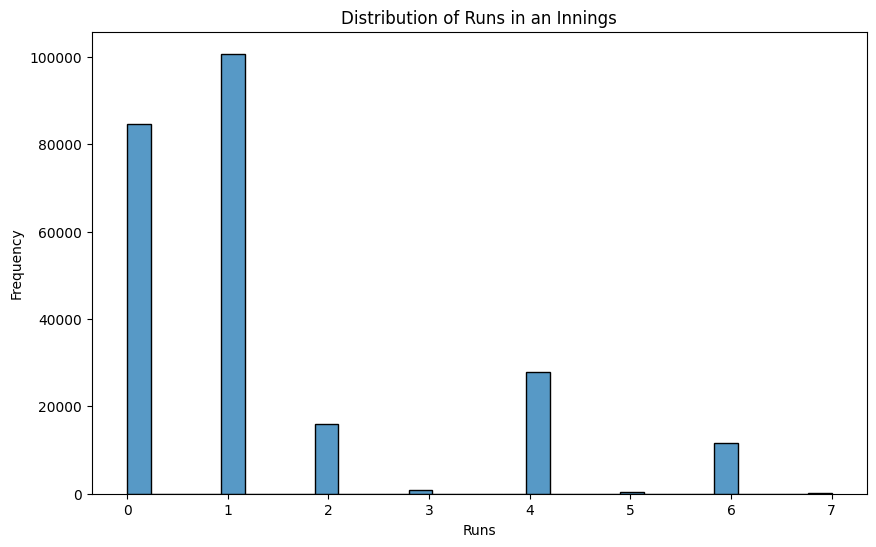

In [ ]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaning['runs'], bins=30)
plt.title("Distribution of Runs in an Innings")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

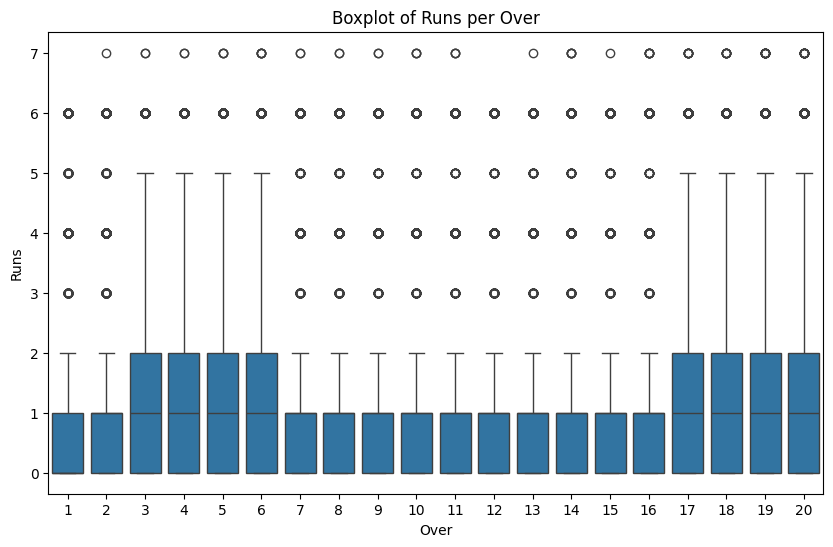

In [ ]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaning, x='over', y='runs')
plt.title("Boxplot of Runs per Over")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.show()

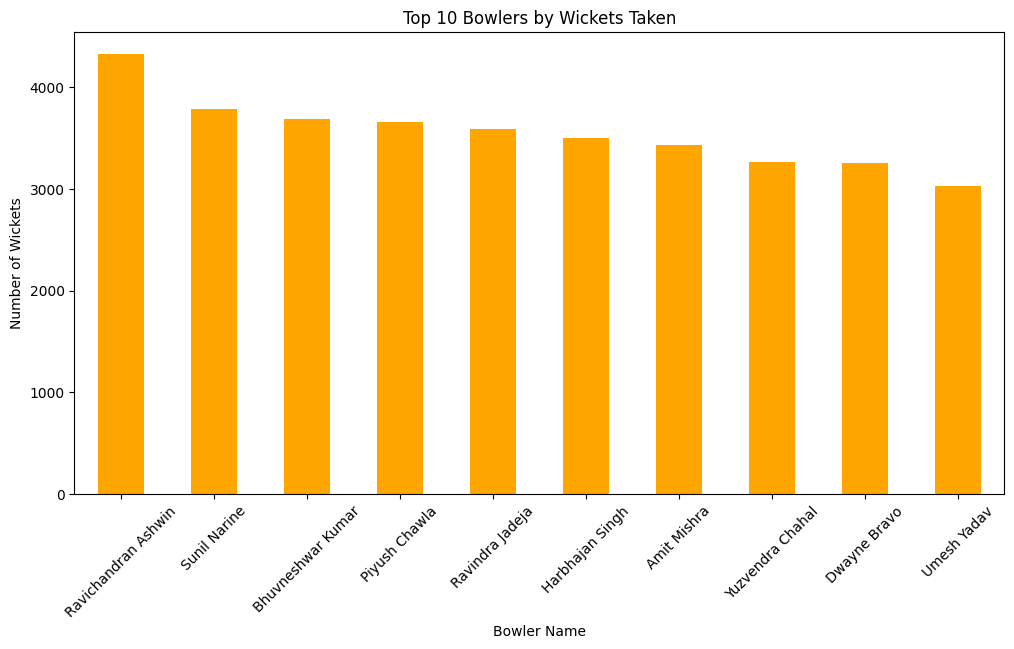

In [ ]:
#Barplot
top_bowlers = df_cleaning['bowler1_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_bowlers.plot(kind='bar', color='orange')
plt.title("Top 10 Bowlers by Wickets Taken")
plt.xlabel("Bowler Name")
plt.ylabel("Number of Wickets")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Barplot
top_batsmen = df_cleaning.groupby('batsman1_name')['runs'].sum().nlargest(10)
fig = px.bar(top_batsmen, x=top_batsmen.index, y=top_batsmen.values, labels={'x': 'Batsman', 'y': 'Runs'},
             title="Top 10 Batsmen by Runs Scored")
fig.update_xaxes(title="Batsman")
fig.update_yaxes(title="Runs Scored")
fig.show()

In [ ]:
#Pie chart
fig = px.pie(df_cleaning, names='isBoundary', title='Boundary vs Non-Boundary Balls', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

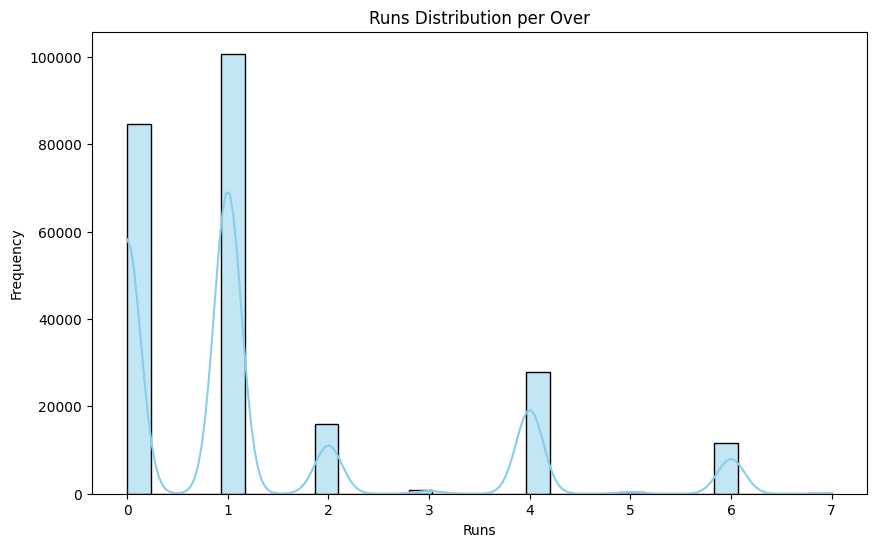

In [ ]:
#Histplot
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaning['runs'], kde=True, bins=30, color='skyblue')
plt.title("Runs Distribution per Over")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#LIne plot
season_runs = df_cleaning.groupby('season')['runs'].mean().reset_index()
fig = px.line(season_runs, x='season', y='runs', title="Average Runs per Season")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Average Runs")
fig.show()

In [ ]:
#Scatter
fig = px.scatter(df_cleaning, x='runs', y='wicket_id', color='current_innings', title="Runs vs Wickets by Innings",
                 labels={'runs': 'Runs', 'wicket_id': 'Wickets'})
fig.show()

In [ ]:
#Scatter
fig = px.scatter(df_cleaning, x='over', y='runs',color='current_innings' , title="Runs per Over by Team")
fig.update_xaxes(title="Over")
fig.update_yaxes(title="Runs")
fig.show()

In [ ]:
#Scatter
fig = px.scatter(df_cleaning, x='batsman1_balls', y='runs', color='batsman1_name', title="Runs vs Balls Faced by Batsmen")
fig.update_xaxes(title="Balls Faced")
fig.update_yaxes(title="Runs")
fig.show()

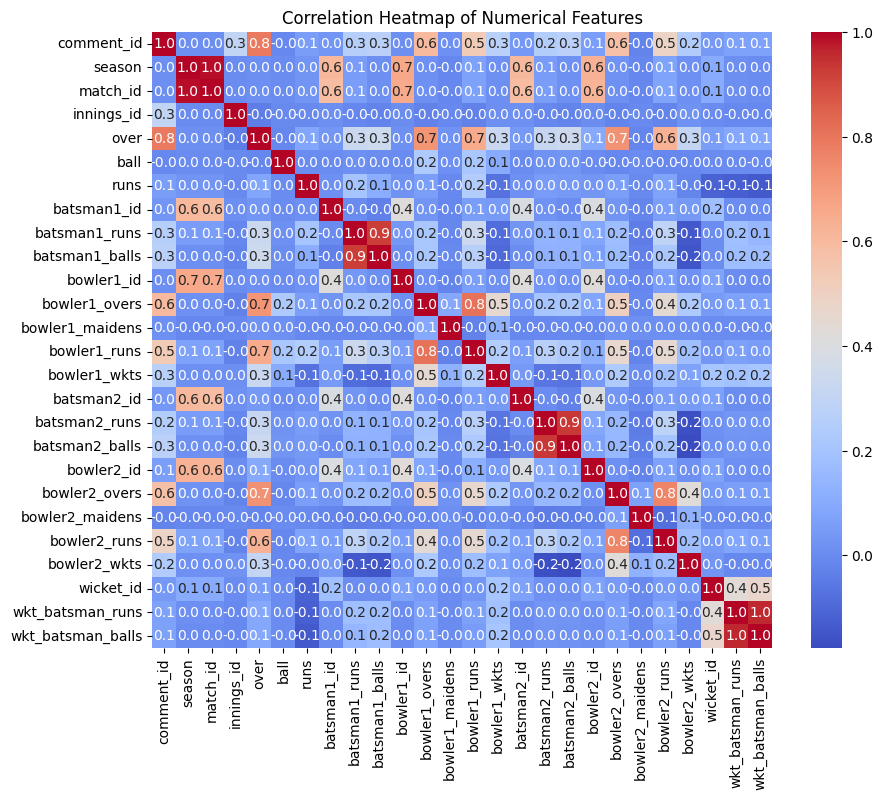

In [ ]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaning.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ***06- Feature_Engineering***

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
final_data = df_cleaning
final_data.head()

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         0.0   
1    1060380.0  Ruturaj Gaikwad              0               0         0.0   
2     379140.0     Devon Conway              0               2         0.0   
3     379140.0     Devon Conway              0               2         0.0   
4    1060380.0  Ruturaj Gaikwad              1               2         0.0   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        0.0                                                0.0   
1        0.0                                                0.0   
2        0.0                                                0.0   
3        0.0                                                0.0   
4        0.0                                                0.0   

   wkt_batsman_balls wkt_text  isRetiredHurt  
0                0.0                   False  
1                0.0                   False  
2                0.0                   False  
3                0.0                   False  
4                0.0                   False

In [ ]:
final_data['bowler2_name'].fillna("Unknown", inplace=True)
final_data['bowler2_overs'].fillna(0, inplace=True)
final_data['bowler2_maidens'].fillna(0, inplace=True)
final_data['bowler2_runs'].fillna(0, inplace=True)
final_data['bowler2_wkts'].fillna(0, inplace=True)

<ipython-input-117-cb83f044fec6>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-117-cb83f044fec6>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
final_data.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt'],
      dtype='object')

In [ ]:
final_data['season'].fillna(2023, inplace=True)

<ipython-input-119-b984c0d98c14>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
final_ds=final_data[['season','match_id','innings_id', 'batsman1_name','home_team', 'away_team', 'current_innings',
                      'over', 'ball', 'runs', 'wicket_id',
                      'wkt_batsman_runs']].copy()

In [ ]:
final_ds.head()

season  match_id  innings_id    batsman1_name home_team away_team  \
0  2023.0   1359475           1     Devon Conway        GT       CSK   
1  2023.0   1359475           1     Devon Conway        GT       CSK   
2  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4  2023.0   1359475           1     Devon Conway        GT       CSK   

  current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  
0             CSK     1     1     0        0.0               0.0  
1             CSK     1     2     1        0.0               0.0  
2             CSK     1     3     0        0.0               0.0  
3             CSK     1     4     1        0.0               0.0  
4             CSK     1     5     0        0.0               0.0

In [ ]:
#Calculate wickets lost
final_ds['wickets_lost'] = final_ds.groupby(['match_id', 'current_innings'])['wkt_batsman_runs']\
                                                 .transform(lambda x: (x != 0).cumsum())

In [ ]:
#Calculate total runs for each match and innings
final_ds['cumulative_runs'] = final_ds.groupby(['match_id', 'current_innings'])['runs'].cumsum()

In [ ]:
#Calculate run rate
final_ds['run_rate'] = final_ds['cumulative_runs'] / (final_ds['over'] + 0.1)

In [ ]:
final_ds.head(50)

season  match_id  innings_id    batsman1_name home_team away_team  \
0   2023.0   1359475           1     Devon Conway        GT       CSK   
1   2023.0   1359475           1     Devon Conway        GT       CSK   
2   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4   2023.0   1359475           1     Devon Conway        GT       CSK   
5   2023.0   1359475           1     Devon Conway        GT       CSK   
6   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
7   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
8   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
9   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
10  2023.0   1359475           1     Devon Conway        GT       CSK   
11  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
12  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
13  2023.0   1359475           1     Devon Conway        GT       CSK   
14  2023.0   1359475           1        Moeen Ali        GT       CSK   
15  2023.0   1359475           1        Moeen Ali        GT       CSK   
16  2023.0   1359475           1        Moeen Ali        GT       CSK   
17  2023.0   1359475           1        Moeen Ali        GT       CSK   
18  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
19  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
20  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
21  2023.0   1359475           1        Moeen Ali        GT       CSK   
22  2023.0   1359475           1        Moeen Ali        GT       CSK   
23  2023.0   1359475           1        Moeen Ali        GT       CSK   
24  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
25  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
26  2023.0   1359475           1        Moeen Ali        GT       CSK   
27  2023.0   1359475           1        Moeen Ali        GT       CSK   
28  2023.0   1359475           1        Moeen Ali        GT       CSK   
29  2023.0   1359475           1        Moeen Ali        GT       CSK   
30  2023.0   1359475           1        Moeen Ali        GT       CSK   
31  2023.0   1359475           1        Moeen Ali        GT       CSK   
32  2023.0   1359475           1        Moeen Ali        GT       CSK   
33  2023.0   1359475           1        Moeen Ali        GT       CSK   
34  2023.0   1359475           1        Moeen Ali        GT       CSK   
35  2023.0   1359475           1        Moeen Ali        GT       CSK   
36  2023.0   1359475           1       Ben Stokes        GT       CSK   
37  2023.0   1359475           1       Ben Stokes        GT       CSK   
38  2023.0   1359475           1       Ben Stokes        GT       CSK   
39  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
40  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
41  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
42  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
43  2023.0   1359475           1       Ben Stokes        GT       CSK   
44  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
45  2023.0   1359475           1       Ben Stokes        GT       CSK   
46  2023.0   1359475           1       Ben Stokes        GT       CSK   
47  2023.0   1359475           1    Ambati Rayudu        GT       CSK   
48  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
49  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   

   current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  \
0              CSK     1     1     0        0.0               0.0   
1              CSK     1     2     1        0.0               0.0   
2              CSK     1     3     0        0.0               0.0   
3   

In [ ]:
print(final_ds['wickets_lost'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
teams_in_ipl = pd.concat([final_ds['home_team'], final_ds['away_team']]).unique().tolist()

In [ ]:
teams_in_ipl

['GT',
 'PBKS',
 'LSG',
 'SRH',
 'RCB',
 'CSK',
 'DC',
 'RR',
 'KKR',
 'MI',
 'KXIP',
 'RPS',
 'GL',
 'PWI',
 'Kochi']

In [ ]:
teams_mapped = {team: idx for idx, team in enumerate(teams_in_ipl)}

In [ ]:
print(teams_mapped)

{'GT': 0, 'PBKS': 1, 'LSG': 2, 'SRH': 3, 'RCB': 4, 'CSK': 5, 'DC': 6, 'RR': 7, 'KKR': 8, 'MI': 9, 'KXIP': 10, 'RPS': 11, 'GL': 12, 'PWI': 13, 'Kochi': 14}


In [ ]:
final_ds['home_teams'] = final_ds['home_team'].map(teams_mapped)
final_ds['away_teams'] = final_ds['away_team'].map(teams_mapped)

In [ ]:
print(final_ds['current_innings'].unique())

['CSK' 'GT' 'PBKS' 'KKR' 'LSG' 'DC' 'RR' 'SRH' 'MI' 'RCB' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']


In [ ]:
final_ds['current_innings'] = final_ds['current_innings'].map(teams_mapped)

In [ ]:
final_ds.head()

season  match_id  innings_id    batsman1_name home_team away_team  \
0  2023.0   1359475           1     Devon Conway        GT       CSK   
1  2023.0   1359475           1     Devon Conway        GT       CSK   
2  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4  2023.0   1359475           1     Devon Conway        GT       CSK   

   current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  \
0                5     1     1     0        0.0               0.0   
1                5     1     2     1        0.0               0.0   
2                5     1     3     0        0.0               0.0   
3                5     1     4     1        0.0               0.0   
4                5     1     5     0        0.0               0.0   

   wickets_lost  cumulative_runs  run_rate  home_teams  away_teams  
0             0                0  0.000000           0           5  
1             0                1  0.909091           0           5  
2             0                1  0.909091           0           5  
3             0                2  1.818182           0           5  
4             0                2  1.818182           0           5

***Downloading the final datset***

In [ ]:
#final_ds.to_csv('modelling_final.csv', index=False)

In [ ]:
#from google.colab import files

# Download the CSV file
#files.download('modelling_final.csv')

# ***07- Baseline_Model***

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

In [ ]:
model_df = pd.read_csv('modelling_final.csv')

In [ ]:
target = 'cumulative_runs'
features = ['over', 'ball','current_innings','home_teams','away_teams','run_rate','wickets_lost']

In [ ]:
X = model_df[features]
y = model_df[target]

In [ ]:
X

over  ball  current_innings  home_teams  away_teams  run_rate  \
0          1     1                5           0           5  0.000000   
1          1     2                5           0           5  0.909091   
2          1     3                5           0           5  0.909091   
3          1     4                5           0           5  1.818182   
4          1     5                5           0           5  1.818182   
...      ...   ...              ...         ...         ...       ...   
236400     3     4                4          10           4  1.935484   
236401     3     5                4          10           4  3.225806   
236402     3     6                4          10           4  4.516129   
236403     4     1                4          10           4  4.390244   
236404     4     2                4          10           4  5.365854   

        wickets_lost  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
236400             1  
236401             1  
236402             1  
236403             1  
236404             1  

[236405 rows x 7 columns]

In [ ]:
y

0          0
1          1
2          1
3          2
4          2
          ..
236400     6
236401    10
236402    14
236403    18
236404    22
Name: cumulative_runs, Length: 236405, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

over  ball  current_innings  home_teams  away_teams   run_rate  \
107957     2     4               12           9          12   5.714286   
62105     17     3                8           8           7   8.538012   
70927     15     2                3           3           6   6.423841   
219271    13     2                6           3           6   6.259542   
180158    11     6                4           4           9   7.657658   
...      ...   ...              ...         ...         ...        ...   
119879    10     4                3           4           3   9.603960   
103694    12     4                6          12           6   8.595041   
131932    16     6               10          10           5   5.838509   
146867    10     3                9           9           7  10.693069   
121958     8     4                3           4           3  10.123457   

        wickets_lost  
107957             1  
62105              3  
70927              2  
219271             3  
180158             3  
...              ...  
119879             1  
103694             5  
131932             6  
146867             4  
121958             0  

[189124 rows x 7 columns]

In [ ]:
X_test

over  ball  current_innings  home_teams  away_teams   run_rate  \
81969      2     2                8           8          10   2.857143   
7687       8     2                8           8           5   5.802469   
202485    16     6                5           8           5   6.397516   
169092    13     3               13          10          13   5.954198   
161505    17     2                6           6           4   7.660819   
...      ...   ...              ...         ...         ...        ...   
163972     5     1                3           3           7   1.764706   
89221      1     2                4          10           4   1.818182   
42896      7     4                9           9           5   9.154930   
12981      2     6                7           8           7  19.047619   
159898    10     6                4          10           4   8.415842   

        wickets_lost  
81969              0  
7687               2  
202485             3  
169092             5  
161505             5  
...              ...  
163972             2  
89221              0  
42896              0  
12981              0  
159898             0  

[47281 rows x 7 columns]

In [ ]:
y_train

107957     12
62105     146
70927      97
219271     82
180158     85
         ... 
119879     97
103694    104
131932     94
146867    108
121958     82
Name: cumulative_runs, Length: 189124, dtype: int64

In [ ]:
y_test

81969       6
7687       47
202485    103
169092     78
161505    131
         ... 
163972      9
89221       2
42896      65
12981      40
159898     85
Name: cumulative_runs, Length: 47281, dtype: int64

# ***08- Modeling(Final)***

In [ ]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "R² Score": []
}

In [ ]:
#function for evaluation metrics
def evaluate_model(name,y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    results["Model"].append(name)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["R² Score"].append(r2)


**Linear Regression**

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
evaluate_model("Linear Regression",y_test, lr_pred)

MSE: 227.206
RMSE: 15.073
R² Score: 0.907


**K-Nearest Neighbors**

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_pred = knn_model.predict(X_test)

In [ ]:
evaluate_model("K-Nearest Neighbors",y_test, knn_pred)

MSE: 9.431
RMSE: 3.071
R² Score: 0.996


**Decision Tree**

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
evaluate_model("Decision Tree",y_test, dt_pred)

MSE: 0.084
RMSE: 0.290
R² Score: 1.000


**Random Forest**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
evaluate_model("Random Forest",y_test, rf_pred)

MSE: 0.072
RMSE: 0.268
R² Score: 1.000


**Extreme Gradient Boost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test)

In [ ]:
evaluate_model("XGBoost",y_test, xgb_pred)

MSE: 0.574
RMSE: 0.758
R² Score: 1.000


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model         MSE       RMSE  R² Score
0    Linear Regression  227.205678  15.073343  0.907022
1  K-Nearest Neighbors    9.430536   3.070918  0.996141
2        Decision Tree    0.084199   0.290170  0.999966
3        Random Forest    0.071934   0.268206  0.999971
4              XGBoost    0.574223   0.757775  0.999765


**Upon the results we can conclude that Random Forest Regressor is the efficient model since it has less mse,rmse and high r2 score**

# ***09-Model_Evaluation***

Since random forest is most efficient we will go ahead with random forest regressor

Evaluating Training set

In [ ]:
 from sklearn.metrics import mean_absolute_error, explained_variance_score

In [ ]:
train_predictions = rf_model.predict(X_train)

In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)

In [ ]:
train_rmse = np.sqrt(train_mse)

In [ ]:
train_r2 = r2_score(y_train, train_predictions)

In [ ]:
train_mae = mean_absolute_error(y_train, train_predictions)

In [ ]:
train_explained_variance = explained_variance_score(y_train, train_predictions)

In [ ]:
print("Training Set Metrics:")
print(f"MSE: {train_mse:.3f}")
print(f"RMSE: {train_rmse:.3f}")
print(f"MAE: {train_mae:.3f}")
print(f"R² Score: {train_r2:.3f}")
print(f"Explained Variance: {train_explained_variance:.3f}")

Training Set Metrics:
MSE: 0.008
RMSE: 0.092
MAE: 0.004
R² Score: 1.000
Explained Variance: 1.000


Evaluating Testing Set

In [ ]:
test_predictions = rf_model.predict(X_test)

In [ ]:
test_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
test_rmse = np.sqrt(test_mse)

In [ ]:
test_r2 = r2_score(y_test, test_predictions)

In [ ]:
test_mae = mean_absolute_error(y_test, test_predictions)

In [ ]:
test_explained_variance = explained_variance_score(y_test, test_predictions)

In [ ]:
print("Test Set Metrics:")
print(f"MSE: {test_mse:.3f}")
print(f"RMSE: {test_rmse:.3f}")
print(f"MAE: {test_mae:.3f}")
print(f"R² Score: {test_r2:.3f}")
print(f"Explained Variance: {test_explained_variance:.3f}")


Test Set Metrics:
MSE: 0.072
RMSE: 0.268
MAE: 0.012
R² Score: 1.000
Explained Variance: 1.000


CROSS VALIDATION OF MODEL

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

In [ ]:
mean_score = cv_scores.mean()
std_score = cv_scores.std()

In [ ]:
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", mean_score)
print("Standard Deviation of R² Scores:", std_score)

Cross-Validation R² Scores: [0.99999667 0.99999005 0.99997708 0.99820814 0.9939062 ]
Mean R² Score: 0.9984156267304893
Standard Deviation of R² Scores: 0.002357737956850646


In [ ]:
model = RandomForestRegressor(random_state=42)


In [ ]:
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
sample_data = X.sample(10, random_state=42)

In [ ]:
predictions = model.predict(sample_data)

In [ ]:
actual_values = y.loc[sample_data.index]

In [ ]:
sample_data['Predicted_Cumulative_Runs'] = predictions

In [ ]:
sample_data['Actual_Cumulative_Runs'] = actual_values.values

In [ ]:
print(sample_data)

        over  ball  current_innings  home_teams  away_teams   run_rate  \
81969      2     2                8           8          10   2.857143   
7687       8     2                8           8           5   5.802469   
202485    16     6                5           8           5   6.397516   
169092    13     3               13          10          13   5.954198   
161505    17     2                6           6           4   7.660819   
189417     8     6                6           6          10  11.234568   
97278      9     2               10          10           9   6.483516   
173524    12     5                9          10           9   5.867769   
83305     10     2                9           9           3   4.950495   
39872     16     3                3           3           7   8.198758   

        wickets_lost  Predicted_Cumulative_Runs  Actual_Cumulative_Runs  
81969              0                        6.0                       6  
7687               2                 

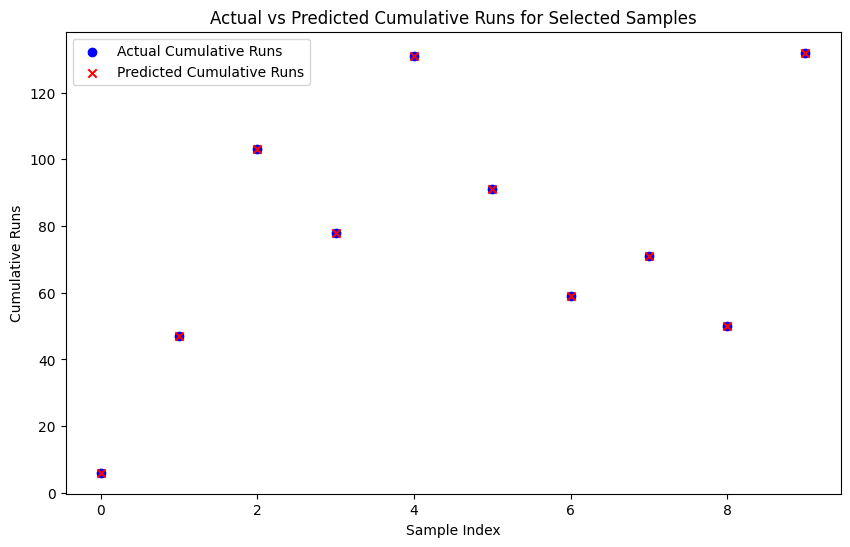

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), actual_values, color='blue', label='Actual Cumulative Runs')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Cumulative Runs', marker='x')
plt.title('Actual vs Predicted Cumulative Runs for Selected Samples')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Runs')
plt.legend()
plt.show()

# ***10-Time_Series_Forecasting***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
forecast_data = pd.read_csv("/content/modelling_final.csv")

In [4]:
forecast_data.head()

season  match_id  innings_id    batsman1_name home_team away_team  \
0  2023.0   1359475           1     Devon Conway        GT       CSK   
1  2023.0   1359475           1     Devon Conway        GT       CSK   
2  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4  2023.0   1359475           1     Devon Conway        GT       CSK   

   current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  \
0                5     1     1     0        0.0               0.0   
1                5     1     2     1        0.0               0.0   
2                5     1     3     0        0.0               0.0   
3                5     1     4     1        0.0               0.0   
4                5     1     5     0        0.0               0.0   

   cumulative_runs  run_rate  wickets_lost  home_teams  away_teams  
0                0  0.000000             0           0           5  
1                1  0.909091             0           0           5  
2                1  0.909091             0           0           5  
3                2  1.818182             0           0           5  
4                2  1.818182             0           0           5

In [5]:
filtered_data=forecast_data[forecast_data['batsman1_name'] == 'Virat Kohli']

In [6]:
total = filtered_data.groupby('season')['runs'].sum()

In [7]:
total

season
2008.0    146
2009.0    258
2010.0    316
2011.0    584
2012.0    375
2013.0    655
2014.0    373
2015.0    519
2016.0    998
2017.0    314
2018.0    539
2019.0    472
2020.0    477
2021.0    423
2022.0    362
2023.0    661
Name: runs, dtype: int64

In [8]:
if isinstance(total, pd.Series):
    total = total.reset_index()

In [9]:
# creating time column from season
total['season'] = pd.to_datetime(total['season'], format='%Y')

In [10]:
total

season  runs
0  2008-01-01   146
1  2009-01-01   258
2  2010-01-01   316
3  2011-01-01   584
4  2012-01-01   375
5  2013-01-01   655
6  2014-01-01   373
7  2015-01-01   519
8  2016-01-01   998
9  2017-01-01   314
10 2018-01-01   539
11 2019-01-01   472
12 2020-01-01   477
13 2021-01-01   423
14 2022-01-01   362
15 2023-01-01   661

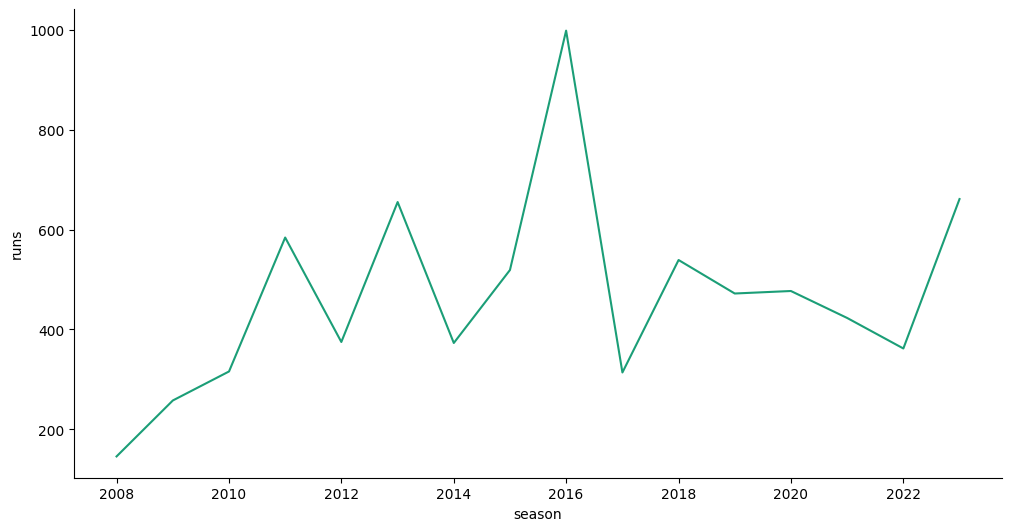

In [11]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['runs']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('runs')

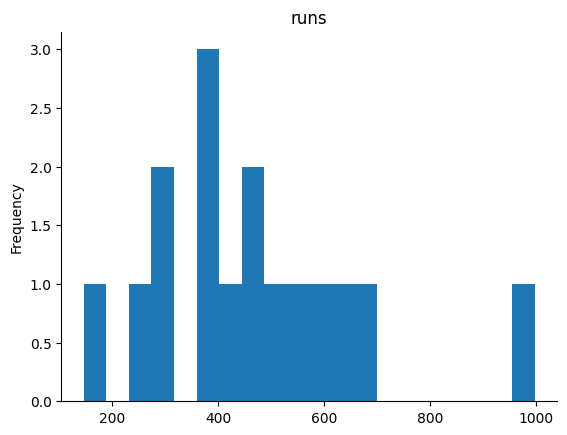

In [12]:
total['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

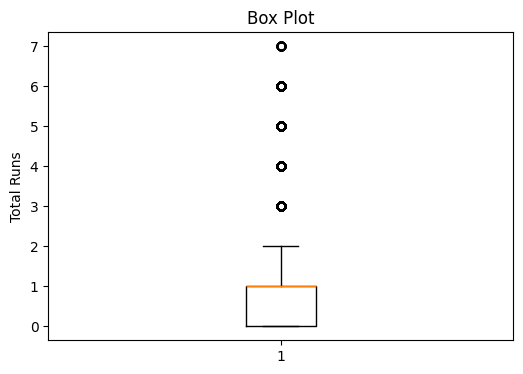

In [14]:
plt.figure(figsize=(6, 4))
plt.boxplot(forecast_data['runs'])
plt.title('Box Plot')
plt.ylabel('Total Runs')
plt.show()

In [15]:
forecast_data['Lag_1'] = forecast_data['runs'].shift(1)
forecast_data['Lag_2'] = forecast_data['runs'].shift(2)

In [16]:
forecast_data.index = pd.to_datetime(forecast_data.index)

In [18]:
forecast_data['Month'] = forecast_data.index.month
forecast_data['Year'] = forecast_data.index.year

In [19]:
forecast_data

season  match_id  innings_id    batsman1_name  \
1970-01-01 00:00:00.000000000  2023.0   1359475           1     Devon Conway   
1970-01-01 00:00:00.000000001  2023.0   1359475           1     Devon Conway   
1970-01-01 00:00:00.000000002  2023.0   1359475           1  Ruturaj Gaikwad   
1970-01-01 00:00:00.000000003  2023.0   1359475           1  Ruturaj Gaikwad   
1970-01-01 00:00:00.000000004  2023.0   1359475           1     Devon Conway   
...                               ...       ...         ...              ...   
1970-01-01 00:00:00.000236400  2008.0    336016           1      Virat Kohli   
1970-01-01 00:00:00.000236401  2008.0    336016           1    Misbah-ul-Haq   
1970-01-01 00:00:00.000236402  2008.0    336016           1    Misbah-ul-Haq   
1970-01-01 00:00:00.000236403  2008.0    336016           1      Virat Kohli   
1970-01-01 00:00:00.000236404  2008.0    336016           1      Virat Kohli   

                              home_team away_team  current_innings  over  \
1970-01-01 00:00:00.000000000        GT       CSK                5     1   
1970-01-01 00:00:00.000000001        GT       CSK                5     1   
1970-01-01 00:00:00.000000002        GT       CSK                5     1   
1970-01-01 00:00:00.000000003        GT       CSK                5     1   
1970-01-01 00:00:00.000000004        GT       CSK                5     1   
...                                 ...       ...              ...   ...   
1970-01-01 00:00:00.000236400      KXIP       RCB                4     3   
1970-01-01 00:00:00.000236401      KXIP       RCB                4     3   
1970-01-01 00:00:00.000236402      KXIP       RCB                4     3   
1970-01-01 00:00:00.000236403      KXIP       RCB                4     4   
1970-01-01 00:00:00.000236404      KXIP       RCB                4     4   

                               ball  runs  wicket_id  wkt_batsman_runs  \
1970-01-01 00:00:00.000000000     1     0        0.0               0.0   
1970-01-01 00:00:00.000000001     2     1        0.0               0.0   
1970-01-01 00:00:00.000000002     3     0        0.0               0.0   
1970-01-01 00:00:00.000000003     4     1        0.0               0.0   
1970-01-01 00:00:00.000000004     5     0        0.0               0.0   
...                             ...   ...        ...               ...   
1970-01-01 00:00:00.000236400     4     1        0.0               0.0   
1970-01-01 00:00:00.000236401     5     4        0.0               0.0   
1970-01-01 00:00:00.000236402     6     4        0.0               0.0   
1970-01-01 00:00:00.000236403     1     4        0.0               0.0   
1970-01-01 00:00:00.000236404     2     4        0.0               0.0   

                               cumulative_runs  run_rate  wickets_lost  \
1970-01-01 00:00:00.000000000                0  0.000000             0   
1970-01-01 00:00:00.000000001                1  0.909091             0   
1970-01-01 00:00:00.000000002                1  0.909091             0   
1970-01-01 00:00:00.000000003                2  1.818182             0   
1970-01-01 00:00:00.000000004                2  1.818182             0   
...                                        ...       ...           ...   
1970-01-01 00:00:00.000236400                6  1.935484             1   
1970-01-01 00:00:00.000236401               10  3.225806             1   
1970-01-01 00:00:00.000236402               14  4.516129             1   
1970-01-01 00:00:00.000236403               18  4.390244             1   
1970-01-01 00:00:00.000236404               22  5.365854             1   

                               home_teams  away_teams  Lag_1  Lag_2  Month  \
1970-01-01 00:00:00.000000000           0           5    NaN    NaN      1   
1970-01-01 00:00:00.000000001           0           5    0.0    NaN      1   
1970-01-01 00:00:00.000000002           0           5    1.0    0.0      1   
1970-01-01 00:00:00.000000003           0           5    0.0    1.0

# Stationary Check

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(forecast_data['runs'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -63.845362
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


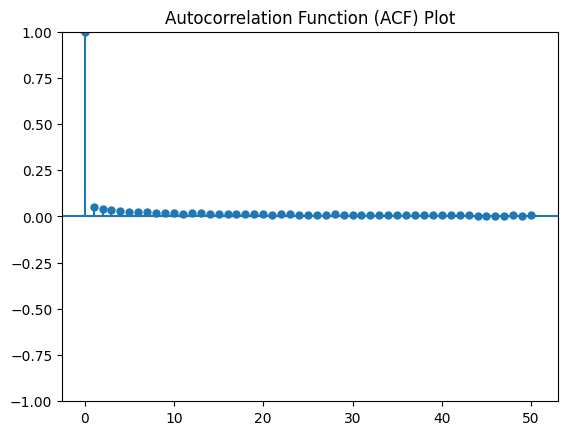

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(forecast_data['runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

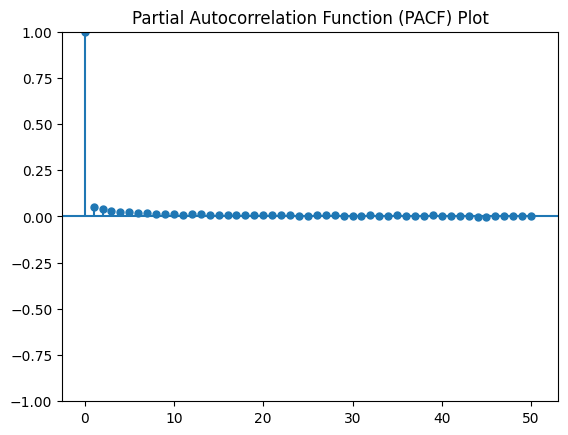

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(forecast_data['runs'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

Dataset is not stationary

# Differencing

In [26]:
forecast_data['Diff_1'] = forecast_data['runs'] - forecast_data['runs'].shift(1)

In [27]:
adf_result_diff = adfuller(forecast_data['Diff_1'].dropna())
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -88.080352
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


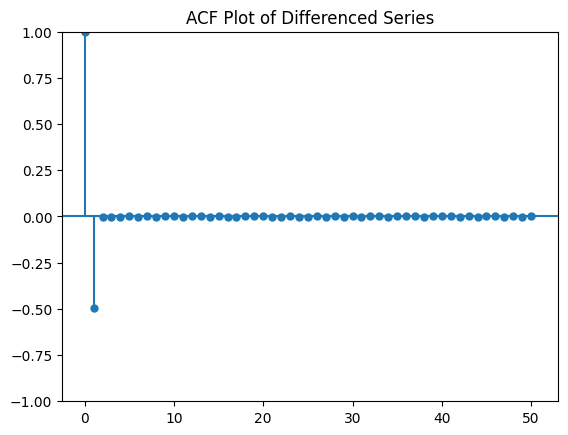

In [29]:
plot_acf(forecast_data['Diff_1'].dropna(), lags=50)
plt.title('ACF Plot of Differenced Series')
plt.show()

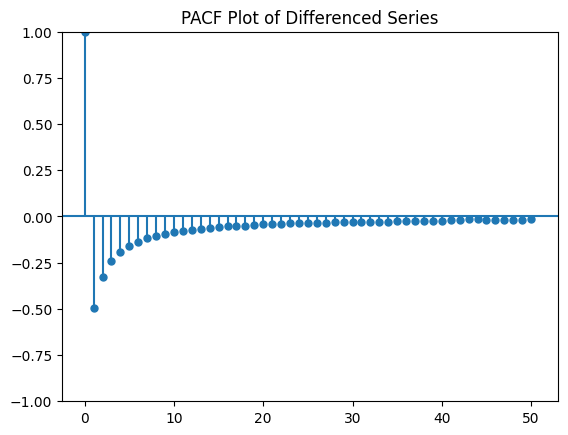

In [31]:
plot_pacf(forecast_data['Diff_1'].dropna(), lags=50)
plt.title('PACF Plot of Differenced Series')
plt.show()

Dataset is Stationary

In [32]:
total.set_index('season', inplace=True)

# Forecasting Model

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [34]:
forecast_model = SARIMAX(total,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [35]:
result_forecast = forecast_model.fit()
result_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
final_forecast = result_forecast.get_forecast(steps=10)
final_forecast_runs = final_forecast.predicted_mean.astype(int)

In [39]:
print(f"Predicted runs for next season (2025): {final_forecast_runs}")

Predicted runs for next season (2025): 2024-01-01    582
2025-01-01    555
2026-01-01    500
2027-01-01    690
2028-01-01    692
2029-01-01    622
2030-01-01    589
2031-01-01    773
2032-01-01    777
2033-01-01    706
Freq: YS-JAN, Name: predicted_mean, dtype: int64


In [41]:
forecast_dataframe = pd.DataFrame({'season': pd.date_range(start='2023-01-01', periods=10, freq='YS'), 'predicted_runs': final_forecast_runs.values})

In [42]:
merged_data = pd.concat([total.reset_index(), forecast_dataframe], ignore_index = True)
merged_data['season'] = pd.to_datetime(merged_data['season'])

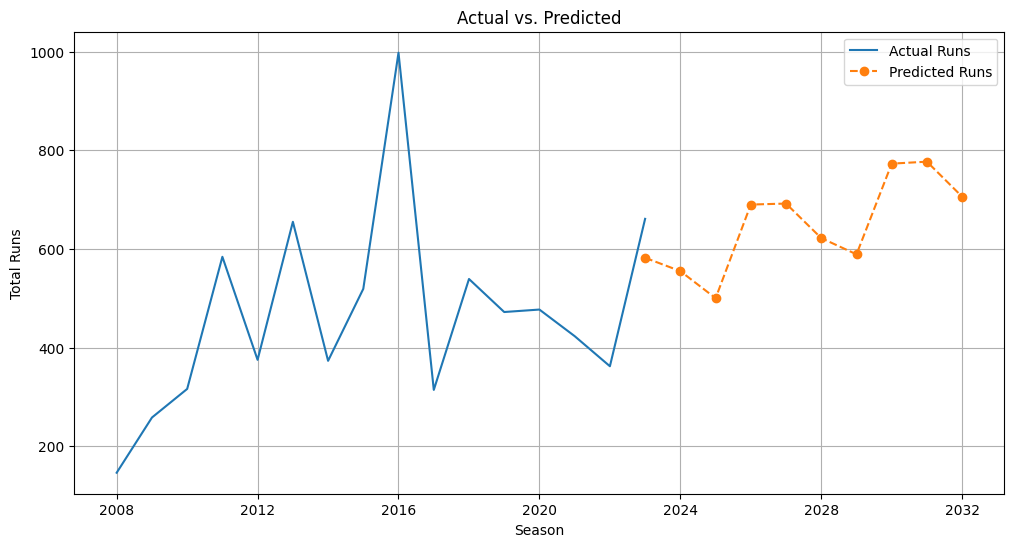

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(total.index, total['runs'], label='Actual Runs')
plt.plot(forecast_dataframe['season'], forecast_dataframe['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
plt.title('Actual vs. Predicted')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()